# **Estimation of The Potential GDP Using Kalman Filter Method**

In [ ]:
!pip install pykalman

In [ ]:
import matplotlib.pyplot as plt

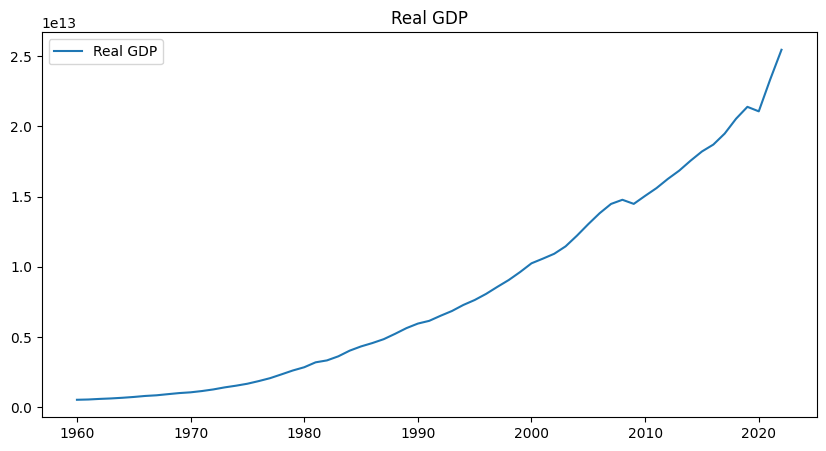

In [ ]:
x = df.Year
y = df.Value
plt.figure(figsize=(10,5))
plt.plot(df['Year'], df['Value'], label='Real GDP')
#plt.plot(df[(df['Year'] >= 1990) & (df['Year'] <= 2022)]['Year'], predicted_gdp, label='Predicted GDP')
plt.title('Real GDP')
plt.legend()
plt.show()
# create a new plot with a title and axis labels
#plt = plot(title="GDP-by-year", x_axis_label='x', y_axis_label='y')
# add a line renderer with legend and line thickness
#plt.line(x, y, line_width=2) # , legend_label="Temp."
# show the results
#show(p) # output_file("lines.html") # output to static HTML file

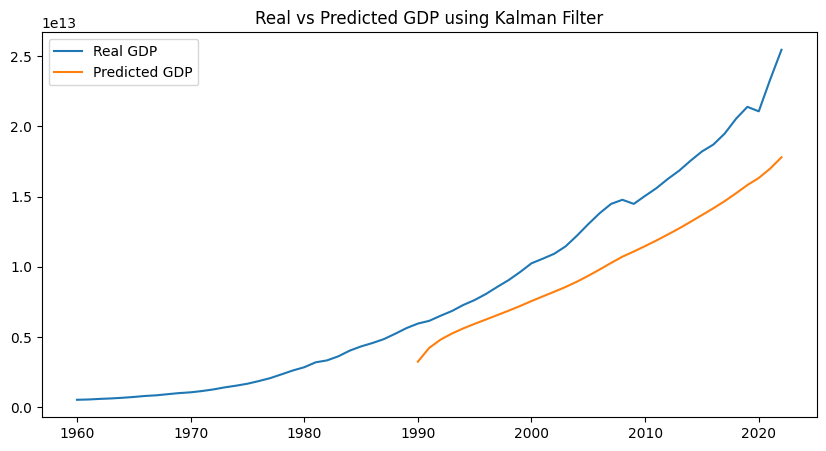

In [ ]:
import pandas as pd
import numpy as np

from pykalman import KalmanFilter

# Load data
df = pd.read_csv('data.csv')

# Check for NaN values in the data
if df['Value'].isnull().any():
    print("Found NaN values in the data. Filling NaN values with the mean of the non-NaN values...")
    df['Value'].fillna(df['Value'].mean(), inplace=True)

# Filter data for training (1960-1989) and prediction (1990-2022)
train_data = df[df['Year'] <= 1989]['Value'].values
predict_data = df[(df['Year'] >= 1990) & (df['Year'] <= 2022)]['Value'].values

# Initialize Kalman Filter
kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=train_data[0],
                  initial_state_covariance=1,
                  observation_covariance=1,
                  transition_covariance=0.01)

# Apply Kalman Filter to estimate states
state_means, _ = kf.filter(train_data)

# Predict GDP for 1990-2022
predicted_gdp, _ = kf.filter(predict_data)

# Plot original data and estimated GDP
plt.figure(figsize=(10,5))
plt.plot(df['Year'], df['Value'], label='Real GDP')
plt.plot(df[(df['Year'] >= 1990) & (df['Year'] <= 2022)]['Year'], predicted_gdp, label='Predicted GDP')
plt.title('Real vs Predicted GDP using Kalman Filter')
plt.legend()
plt.show()

Model Prediction GDP USA (2023) = $20065876080403.5 USA
SciPy


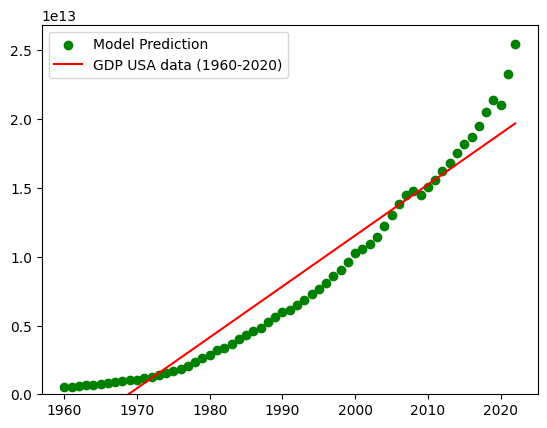

In [ ]:
from scipy import stats
X = df.Year
y = df.Value
slope, intercept, r, p, std_err = stats.linregress(X, y) # scipy
def modelPrediction(x):
  return slope * x + intercept
# Model Prediction GDP USA
model = list(map(modelPrediction, X)) # scipy
x_pred = 2023
y_pred = modelPrediction(x_pred)
print('Model Prediction GDP USA (2023) = ${} USA'.format(y_pred))
print('SciPy')
plt.scatter(X, y, color='green') # Scatter Plot
plt.plot(X, model, color='red') # linestyle='dashed', marker='o', markersize=12
plt.ylim(ymin=0) # starts at zero
plt.legend(['Model Prediction ', 'GDP USA data (1960-2020)'])
plt.show()

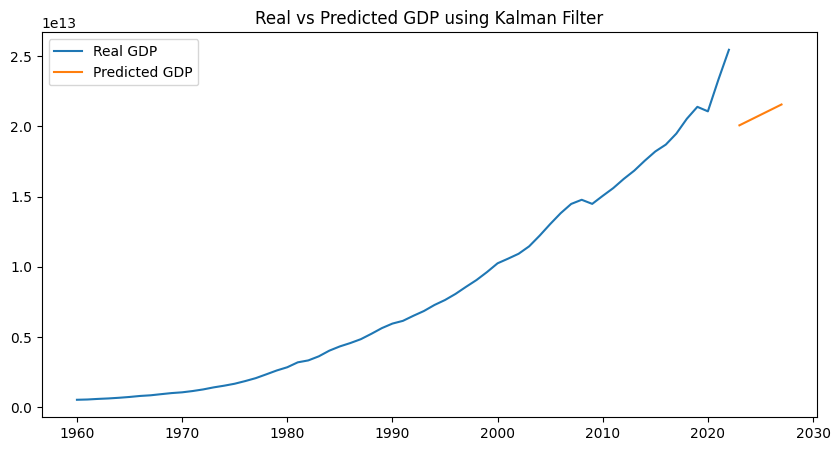

In [ ]:
# prompt: Use kalman filter to predict the GDP values from 2023 to 2027 using the created model

import pandas as pd
import matplotlib.pyplot as plt
# Create a new dataframe from 2023 to 2027
df_future = pd.DataFrame({'Year': range(2023, 2028)})

# Use the model to predict GDP values for the future years
df_future['Value'] = modelPrediction(df_future['Year'])

# Plot the original data and the predicted GDP values
plt.figure(figsize=(10,5))
plt.plot(df['Year'], df['Value'], label='Real GDP')
plt.plot(df_future['Year'], df_future['Value'], label='Predicted GDP')
plt.title('Real vs Predicted GDP using Kalman Filter')
plt.legend()
plt.show()


In [ ]:
# prompt: print  the above values in millions of dollars format

def millions_format(value):
  return f"${value / 1000000000:.2f}B"

df_future['GDP_in_Billions'] = df_future['Value'].apply(millions_format)

print(df_future[['Year', 'GDP_in_Billions']])

   Year GDP_in_Billions
0  2023      $20065.88B
1  2024      $20436.26B
2  2025      $20806.65B
3  2026      $21177.04B
4  2027      $21547.43B


In [ ]:
print(df_future)

   Year         Value GDP_in_Billions
0  2023  2.006588e+13      $20065.88B
1  2024  2.043626e+13      $20436.26B
2  2025  2.080665e+13      $20806.65B
3  2026  2.117704e+13      $21177.04B
4  2027  2.154743e+13      $21547.43B


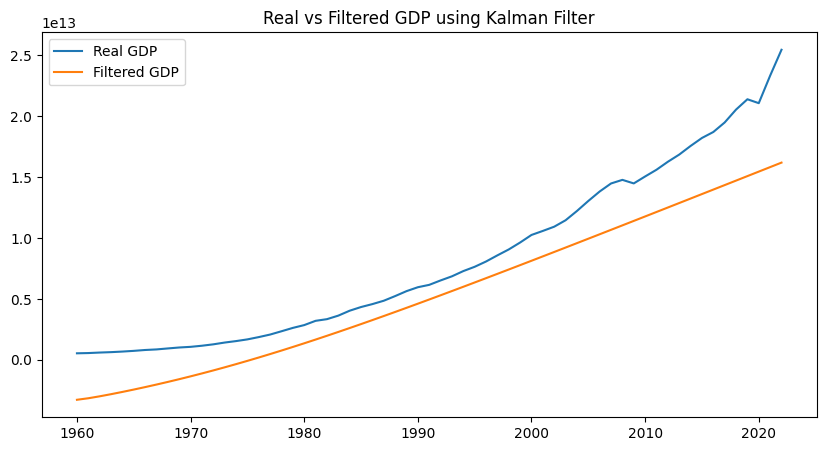

In [ ]:
# prompt: APPLY KALMAN FILTER ON ABOVE LINE

import matplotlib.pyplot as plt
# Create a Kalman filter object
kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=model[0],
                  initial_state_covariance=1,
                  observation_covariance=1,
                  transition_covariance=0.01)

# Apply the Kalman filter to the data
state_means, _ = kf.filter(model)

# Plot the original data and the filtered data
plt.figure(figsize=(10,5))
plt.plot(X, y, label='Real GDP')
plt.plot(X, state_means, label='Filtered GDP')
plt.title('Real vs Filtered GDP using Kalman Filter')
plt.legend()
plt.show()
